<a href="https://colab.research.google.com/github/ankishore/classify_iris_flowers/blob/main/classify_iris_flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

# Create model

In [24]:
class Model(nn.Module):

  # Layers organized as layer(number of neurons)
  # input(4) --> hidden1(8) --> hidden2(9) --> out(3)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1) # Fully connect input layer to h1
    self.fc2 = nn.Linear(h1, h2) # Fully connect h1 to h2
    self.out = nn.Linear(h2, out_features) # Fully connect h2 to out layer

  # Use ReLU activation function
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

# Instantiate the model
model = Model()

# Load iris dataset

In [25]:
df = pd.read_csv('https://raw.githubusercontent.com/ankishore/classify_iris_flowers/main/iris.csv')

# Split dataset for train and test

In [26]:
X = df.drop('target', axis=1).values # Drop last column (i.e. column name target) and get numpy
y = df['target'].values

# Split dataset with 80% in train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create tensor train/test dataset
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Set loss funciton and optimizer

In [27]:
criterion = nn.CrossEntropyLoss()

# Adam is variant of stochastic gradient descent called Adaptive Moment Estimation
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train the model

In [28]:
epochs = 100
losses = []

for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.item())

  if i%10 == 1:
    print(f'epoch: {i} loss: {loss.item()}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 1 loss: 1.0515797138214111
epoch: 11 loss: 0.8263624310493469
epoch: 21 loss: 0.5168860554695129
epoch: 31 loss: 0.3419422507286072
epoch: 41 loss: 0.2247483879327774
epoch: 51 loss: 0.13678096234798431
epoch: 61 loss: 0.09354770928621292
epoch: 71 loss: 0.0752849206328392
epoch: 81 loss: 0.06668732315301895
epoch: 91 loss: 0.06210373714566231


# Plot loss

Text(0.5, 0, 'epoch')

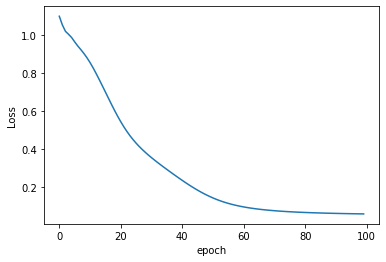

In [29]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

# Validate model

In [30]:
with torch.no_grad(): # Disable gradient calculation
  y_val = model.forward(X_test)
  loss = criterion(y_val, y_test)

print(f'loss: {loss}')

loss: 0.048020463436841965
